<a href="https://colab.research.google.com/github/DianaFerreiraSantos/RID221303_desafio01/blob/main/C%C3%B3pia_de_RID221303_desafio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Etapa 01 - Importação e Exploração Inicial da Base**



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salario_profissionais_dados.csv to salario_profissionais_dados.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('salario_profissionais_dados.csv')

**Etapa 02 - Frequência e Distribuição das Categorias**

In [ ]:
df.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [ ]:
#Linhas e tipo
print(f"Formato:{df.shape}")
print(df.info())

Formato:(3755, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB
None


linhas: 3755;
colunas: 10;
não tem valores ausentes

In [ ]:
print(df.isnull().sum())

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64


In [ ]:
#cargos mais comuns
print("Cargos mais comuns:")
print(df['job_title'].value_counts().head(10))

Cargos mais comuns:
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64


In [ ]:
#nível de experiência
print("Nível de experiência:")
print(df['years_of_experience'].value_counts())

Nível de experiência:
years_of_experience
8     857
6     838
7     821
4     283
5     272
3     250
1     172
2     148
9      60
10     54
Name: count, dtype: int64


In [ ]:
#tamanho das empresas
print("Tamanho das empresas:")
print(df['company_size'].value_counts())

Tamanho das empresas:
company_size
M    3153
L     454
S     148
Name: count, dtype: int64


**Etapa 03 - Estatísticas Descritivas**

In [ ]:
#análise da coluna salary_in_USD
print(df['salary_in_usd'].describe())

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [ ]:
#cálculo da média; mediana; desvio padrão; desvio padrão mínimo; desvio padrão máximmo

media = df['salary_in_usd'].mean()
mediana = df['salary_in_usd'].median()
desvio = df['salary_in_usd'].std()

print(f"Média salarial: {media:.2f} USD")
print(f"Mediana salarial: {mediana:.2f} USD")
print(f"Desvio padrão: {desvio:.2f} USD")
print(f"Desvio padrão mínimo: {df['salary_in_usd'].min():.2f} USD")
print(f"Desvio padrão máximo: {df['salary_in_usd'].max():.2f} USD")

Média salarial: 137570.39 USD
Mediana salarial: 135000.00 USD
Desvio padrão: 63055.63 USD
Desvio padrão mínimo: 5132.00 USD
Desvio padrão máximo: 450000.00 USD


In [ ]:
#distribuição geral - histogramas

import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

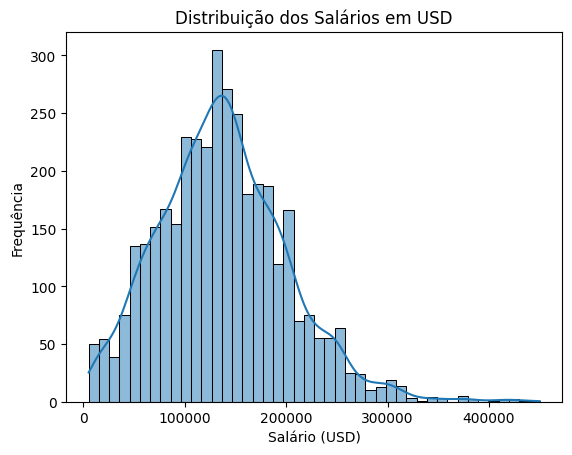

In [ ]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribuição dos Salários em USD")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

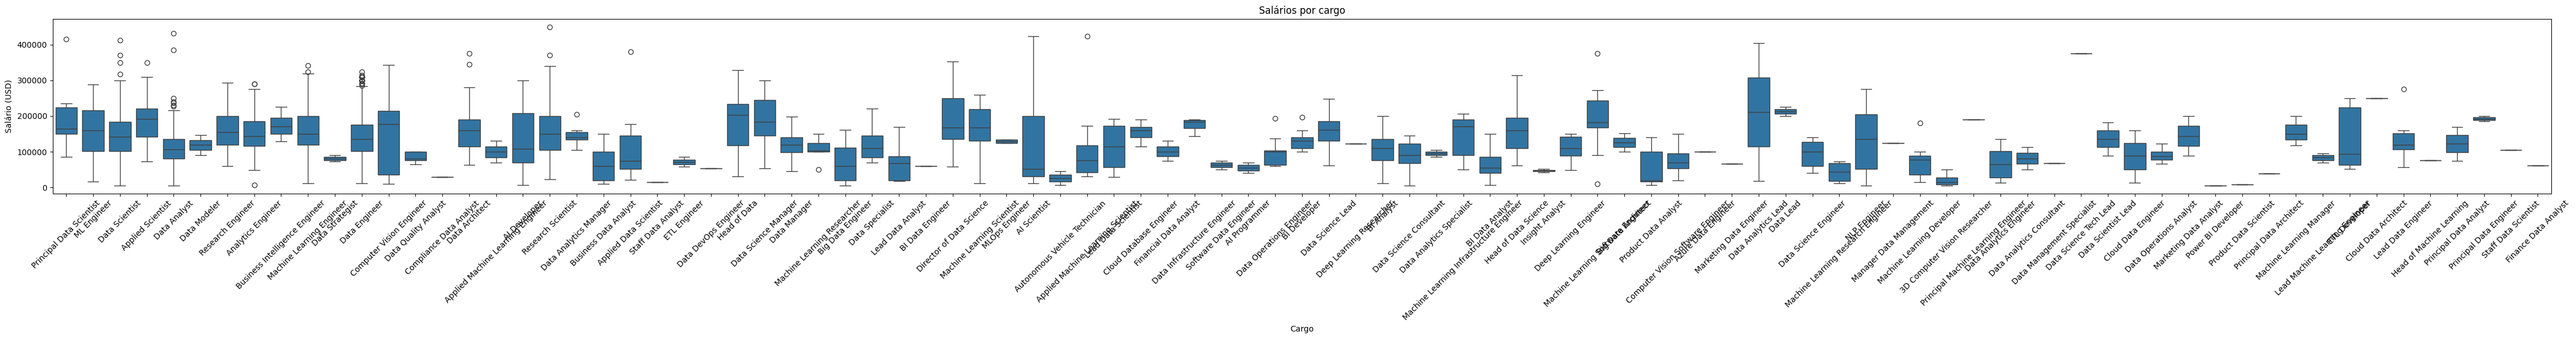

In [ ]:
#Comparações por grupos - boxplots

plt.figure(figsize=(45, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title("Salários por cargo")
plt.xlabel("Cargo")
plt.ylabel("Salário (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("Média salarial pelo tamanho das empresas:")
print(df.groupby('company_size')['salary_in_usd'].mean())

Média salarial pelo tamanho das empresas:
company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


**Etapa 04 -  Comparações por País**

In [ ]:
#salário médio por país

salario_por_pais = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print(salario_por_pais)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


In [ ]:
print("10 países com as maiores médias salariais")
print(salario_por_pais.head(10))

10 países com as maiores médias salariais
company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64


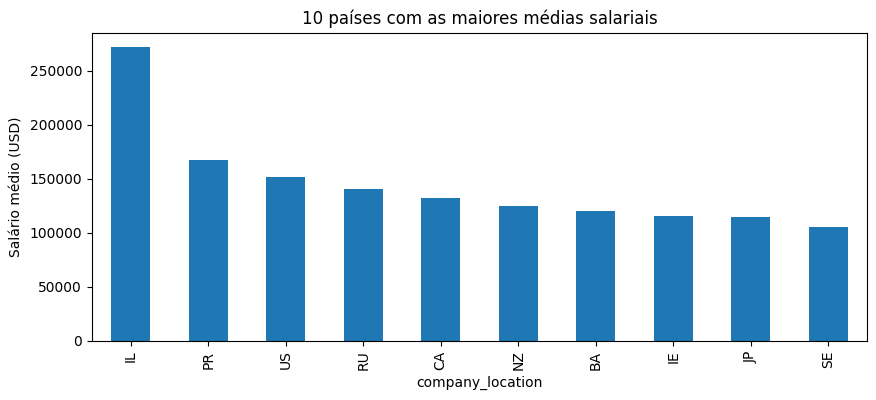

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel("País")
plt.ylabel("Salário médio (USD)")
plt.title("10 países com as maiores médias salariais")
salario_por_pais.head(10).plot(kind='bar')
plt.show()

**Etapa 05 - Correlações e Tendências**

In [ ]:
colunas_numericas = ['salary_in_usd', 'work_year', 'years_of_experience']

In [ ]:
correlacoes = df[colunas_numericas].corr()
print("Matriz de correlações:")
print(correlacoes)

Matriz de correlações:
                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


In [ ]:
for coluna in correlacoes.columns:
    if coluna != 'salary_in_usd':
        corr = correlacoes['salary_in_usd'][coluna]
        print(f"\nCorrelação entre salary_in_usd e {coluna}: {corr:}")

        if corr > 0:
            print("Correlação positiva")
        elif corr < 0:
            print("Correlação negativa")
        else:
            print("Sem correlação")


Correlação entre salary_in_usd e work_year: 0.22829002243291466
Correlação positiva

Correlação entre salary_in_usd e years_of_experience: 0.4107225656456766
Correlação positiva


5.1 - Existe alguma tendência de aumento salarial com os anos?

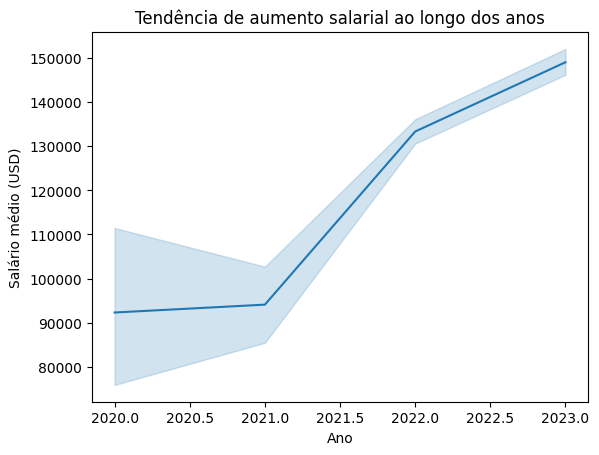

In [ ]:
sns.lineplot(x='work_year', y='salary_in_usd', data=df)

plt.title("Tendência de aumento salarial ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Salário médio (USD)")
plt.show()

5.2 - Quanto maior o tempo de experiência, maior o salário?

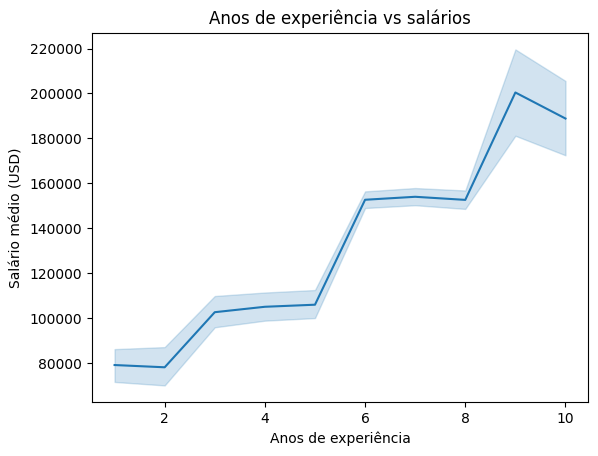

In [ ]:
sns.lineplot(x='years_of_experience', y='salary_in_usd', data=df)

plt.title("Anos de experiência vs salários")
plt.xlabel("Anos de experiência")
plt.ylabel("Salário médio (USD)")
plt.show()